In [335]:
import cv2

import numpy as np

original = cv2.imread("/Users/amir/Desktop/Filtered Image/Original.jpg")
duplicate = cv2.imread("/Users/amir/Desktop/Filtered Image/Original.jpg")
croped = cv2.imread("/Users/amir/Desktop/Filtered Image/Croped.jpg")
recolored = cv2.imread("/Users/amir/Desktop/Filtered Image/Recolored.jpg")
recolored2 = cv2.imread("/Users/amir/Desktop/Filtered Image/Recolored2.jpg")
rotated = cv2.imread("/Users/amir/Desktop/Filtered Image/Rotated.jpg")
popart = cv2.imread("/Users/amir/Desktop/Filtered Image/PopArt.jpg")
resized = cv2.imread("/Users/amir/Desktop/Filtered Image/Resized.jpg")
sharpened = cv2.imread("/Users/amir/Desktop/Filtered Image/Sharpened.jpg")
sunburst = cv2.imread("/Users/amir/Desktop/Filtered Image/Sunburst.jpg")

first = original
second = croped


In [336]:
Resizer = lambda Image, scale: cv2.resize(Image, 
                            (Image.shape[1]//scale, Image.shape[0]//scale), interpolation=cv2.INTER_CUBIC)
#cv2.resize(first, (first.shape[0]//2, first.shape[1]//2), interpolation=cv2.INTER_CUBIC)

In [337]:
first = Resizer(first, 2)
second = Resizer(second, 2)
#assert first.shape == second.shape
print(first.shape)
print(second.shape)

(750, 1500, 3)
(654, 546, 3)


In [338]:
izZero = lambda x: True if sum([cv2.countNonZero(a) for a in cv2.split(x)]) == 0 else False

count = lambda x: " ".join([str(cv2.countNonZero(a)) for a in cv2.split(x)])

In [339]:
if first.shape == second.shape:
    print("The images have the same size and channels")
else:
    print("The images have the different size or/and channels")

The images have the different size or/and channels


# Calculate difference

In [340]:
#difference = first - second
#b, g, r = cv2.split(difference)
#print(count(difference))
#if izZero(difference):
#    print("The images are the same")
#else:
#     print("The images are not the same")

### Measure time for different image sizes

In [341]:
# from time import time
# for i in [1, 2, 4]:
#     begin = time()
#     first = cv2.imread("/Users/amir/Desktop/Filtered Image/Original.jpg")
#     second = cv2.imread("/Users/amir/Desktop/Filtered Image/PopArt.jpg")
#     if i-1:
#         first, second = Resizer(first, i), Resizer(second, i)
#     sift = cv2.xfeatures2d.SIFT_create()
#     kp_1, desc_1 = sift.detectAndCompute(first, None)
#     kp_2, desc_2 = sift.detectAndCompute(second, None)
#     print("Proccesed SIFT for resizing with scale={} : {} s".format(i, time()-begin))

In [347]:
from time import time
begin = time()
sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(first, None)
kp_2, desc_2 = sift.detectAndCompute(second, None)
print("Proccesed {} s".format(time()-begin))

Proccesed 0.3475329875946045 s


In [348]:
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [344]:

 
matches = flann.knnMatch(desc_1, desc_2, k=2)

good_points = []
ratio = 0.6



# Find subimage

In [345]:
if len(good_points)>30:
    
    first= np.float32([ kp_1[m.queryIdx].pt for m in good_points ]).reshape(-1,1,2)
    second = np.float32([ kp_2[m.trainIdx].pt for m in good_points ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(first, second, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w,c = original.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    toShow = cv2.polylines(original,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found") 
    matchesMask = None

Not enough matches are found


In [346]:
for m, n in matches:
    if m.distance < ratio*n.distance:
        good_points.append(m)
print(len(good_points))
result = cv2.drawMatches(first, kp_1, second, kp_2, good_points, None)

1787


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


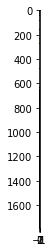

In [334]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.figure(figsize=(100, 100))
#plt.imshow(original[:,:,::-1])
plt.imshow(result[:,:,::-1])

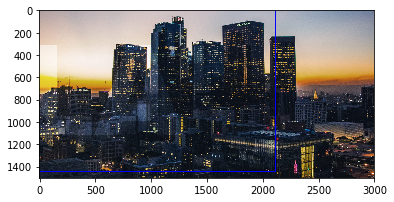

In [332]:
plt.imshow(toShow[:,:,::-1])